# Week 2

## Exercise 1

### Define functions

In [1]:
def read_file(path):
    with open(path, "r") as fo:
        fc = fo.read()
    return fc

def count_chars(string):
    char_dict = {}
    for char in string:
        if char != "\n":
            if char != "\t":
                if char in char_dict:
                    char_dict[char] += 1
                else:
                    char_dict[char] = 1
    return char_dict

def write_chars_file(char_dict):
    lines = []
    for char in char_dict:
        lines.append(f"{char}\t{char_dict[char]}")
    with open("chars.tsv", "w") as fo:
        fo.write("character\tcount\n")
        fo.write("\n".join(lines))

### Apply functions

In [2]:
romeo_text = read_file("romeo.txt")
print(romeo_text[:1500])

Romeo and Juliet
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/romeo-and-juliet/
Created on Jul 31, 2015, from FDT version 0.9.2

Characters in the Play
ROMEO
MONTAGUE, his father
LADY MONTAGUE, his mother
BENVOLIO, their kinsman
ABRAM, a Montague servingman
BALTHASAR, Romeo's servingman
JULIET
CAPULET, her father
LADY CAPULET, her mother
NURSE to Juliet
TYBALT, kinsman to the Capulets
PETRUCHIO, Tybalt's companion
Capulet's Cousin
Servingmen:
  SAMPSON
  GREGORY
  PETER
Other Servingmen
ESCALUS, Prince of Verona
PARIS, the Prince's kinsman and Juliet's suitor
MERCUTIO, the Prince's kinsman and Romeo's friend
Paris' Page
FRIAR LAWRENCE
FRIAR JOHN
APOTHECARY
Three or four Citizens
Three Musicians
Three Watchmen
CHORUS
Attendants, Maskers, Torchbearers, a Boy with a drum, Gentlemen, Gentlewomen, Tybalt's Page, Servingmen.


THE PROLOGUE
[Enter Chorus.

In [3]:
count_dict = count_chars(romeo_text)
print(count_dict)

{'R': 852, 'o': 8059, 'm': 2917, 'e': 12180, ' ': 22192, 'a': 7304, 'n': 6069, 'd': 3825, 'J': 207, 'u': 3214, 'l': 4449, 'i': 5830, 't': 8711, 'b': 1420, 'y': 2513, 'W': 452, 'S': 509, 'h': 6632, 'k': 844, 's': 6226, 'p': 1258, 'r': 5714, 'E': 949, 'B': 311, 'A': 956, '.': 1878, 'M': 531, 'w': 2147, 'P': 322, 'c': 1811, 'N': 479, 'F': 231, 'g': 1714, 'L': 529, ':': 25, '/': 5, 'f': 1812, '-': 424, 'j': 76, 'C': 462, '3': 7, '1': 8, ',': 2663, '2': 8, '0': 2, '5': 6, 'D': 136, 'T': 1070, 'v': 1006, '9': 1, '=': 227, 'O': 852, 'G': 204, 'U': 436, 'Y': 153, 'V': 107, 'I': 1217, 'H': 275, "'": 587, 'z': 28, '[': 246, ']': 246, '(': 15, ')': 15, ';': 95, 'x': 129, 'q': 61, '?': 377, 'Q': 3, '!': 244, '"': 158, 'Z': 5, '4': 5, 'K': 8, '6': 1}


In [4]:
write_chars_file(count_dict)

## Exercise 2

### Read in file as dataframe

In [5]:
import pandas as pd

df = pd.read_csv("chars.tsv", sep="\t", quoting=3, header=0)
print(df)

   character  count
0          R    852
1          o   8059
2          m   2917
3          e  12180
4             22192
..       ...    ...
70         "    158
71         Z      5
72         4      5
73         K      8
74         6      1

[75 rows x 2 columns]


### Create new column alpha

In [6]:
df["alpha"] = df.character.str.isalpha()
print(df)

   character  count  alpha
0          R    852   True
1          o   8059   True
2          m   2917   True
3          e  12180   True
4             22192  False
..       ...    ...    ...
70         "    158  False
71         Z      5   True
72         4      5  False
73         K      8   True
74         6      1  False

[75 rows x 3 columns]


### Create DF with mean values per alpha value

In [7]:
df[["alpha", "count"]].groupby("alpha").mean()

count
alpha             
False  1226.458333
True   2102.058824

## Exercise 3

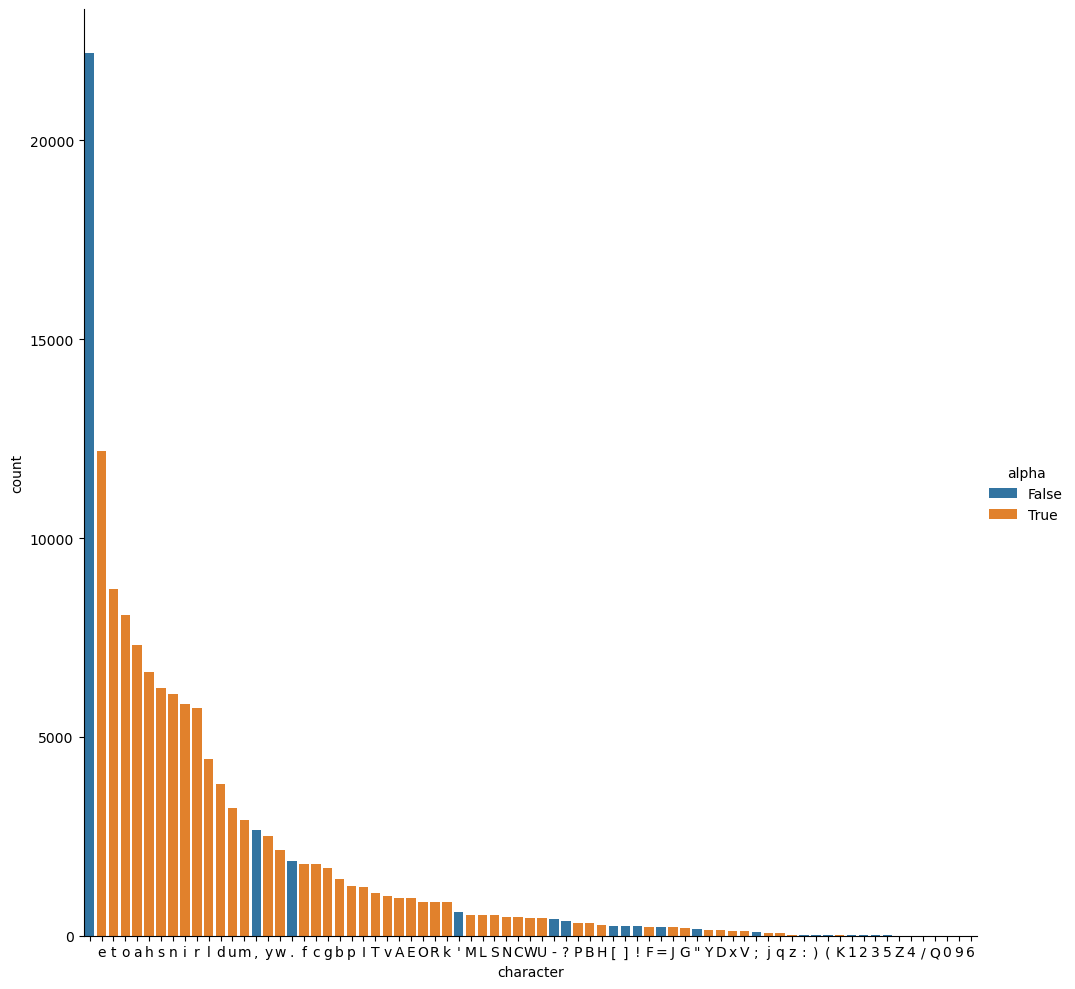

In [8]:
import seaborn as sns

sns.catplot(kind = "bar", data=df.sort_values(by = "count", ascending = False), x = "character", y = "count", hue = "alpha", height = 10)